In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pickle

## UCB expectile

In [3]:
with open('results/expectile_ucb_325107.pkl', 'rb') as f:
    res = pickle.load(f)

In [4]:
print(res['info'])

T  = res['info']['T']
M  = res['info']['M']
n_iter_ogd = res['info']['n_iter_ogd']
step_size = res['info']['step_size']
tt = np.linspace(1, T, T)

algs = ['ucb', 'expectile_ucb', 'expectile_ogducb']
colors = dict(zip(algs, ['blue', 'orange', 'green']))
labels = dict(zip(algs, ['LinUCB (mean)', 'LinUCB-CR (expectile)', 'LinUCB-OGD-CR (expectile)']))
markers = dict(zip(algs, ['s', 'd', '^']))

m_regrets = {}
std_regrets = {}
q_regrets_25 = {}
q_regrets_75 = {}
q_regrets_05 = {}
q_regrets_95 = {}

mean_time = {}
std_time = {}

for alg in algs:
    R = np.cumsum(res['results'][alg], axis=0)
    m_regrets[alg] = np.median(R, axis=1)
    std_regrets[alg] = np.std(R, axis=1)
    q_regrets_25[alg] = np.quantile(R, 0.25, axis=1)
    q_regrets_75[alg] = np.quantile(R, 0.75, axis=1)
    q_regrets_05[alg] = np.quantile(R, 0.05, axis=1)
    q_regrets_95[alg] = np.quantile(R, 0.95, axis=1)
    
    mean_time[alg] =  np.round(np.mean(res['results']['time_' + alg]), 2)
    std_time[alg] = np.round(np.std(res['results']['time_' + alg]), 2)
    
print(
    {
        'mean_time':mean_time,
        'std_time': std_time,
    }
)

{'T': 1500, 'M': 500, 'regularization': 0.1, 'exploration_bonus_scale': 0.1, 'n_iter_ogd': 5, 'step_size': 0.1, 'warmup': 5}
{'mean_time': {'ucb': 0.4, 'expectile_ucb': 230.98, 'expectile_ogducb': 20.41}, 'std_time': {'ucb': 0.02, 'expectile_ucb': 21.73, 'expectile_ogducb': 3.92}}


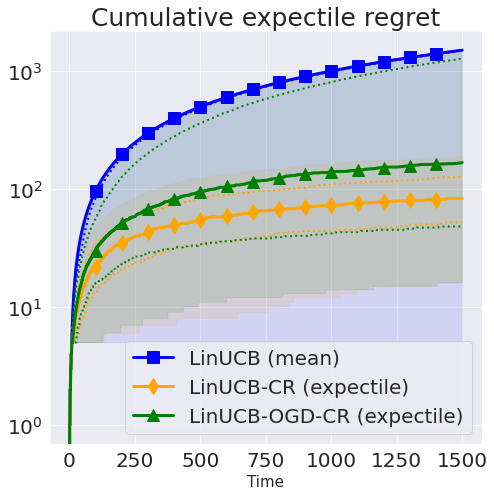

In [5]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)
    
    for alg in algs:
        ax.plot(tt, m_regrets[alg], color=colors[alg], label=labels[alg], linewidth=3, marker=markers[alg], markersize=12, markevery=100)
        ax.fill_between(tt, y1=q_regrets_05[alg], y2=q_regrets_95[alg], color=colors[alg], alpha=0.1)
        ax.plot(tt, q_regrets_25[alg], color=colors[alg], linestyle='dotted', linewidth=2)
        ax.plot(tt, q_regrets_75[alg], color=colors[alg], linestyle='dotted', linewidth=2)
        
#         ax.fill_between(
#             tt, 
#             y1=np.clip(m_regrets[alg] - 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None), 
#             y2=np.clip(m_regrets[alg] + 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None),
#             color=colors[alg], 
#             alpha=0.1
#         )
    
#     ax.set_xlim([1, T])
#     ax.set_ylim([1, 200])
    ax.set_yscale('log')
    ax.set_xlabel('Time', fontsize=15)
    
    ax.set_title('Cumulative expectile regret', fontsize=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(loc='lower right', prop={'size': 20})

    plt.tight_layout()
    plt.show()
    fig.savefig('expectile_ucb.pdf', format='pdf')

## LinUCB expectile

In [6]:
with open('results/expectile_linucb_312227.pkl', 'rb') as f:
    res = pickle.load(f)

In [7]:
print(res['info'])

T  = res['info']['T']
M  = res['info']['M']
n_iter_ogd = res['info']['n_iter_ogd']
step_size = res['info']['step_size']
tt = np.linspace(1, T, T)

# algs = ['expectile_ucb']
algs = ['ucb', 'expectile_ucb', 'expectile_ogducb']
colors = dict(zip(algs, ['blue', 'orange', 'green']))
labels = dict(zip(algs, ['LinUCB (mean)', 'LinUCB-CR (expectile)', 'LinUCB-OGD-CR (expectile)']))
markers = dict(zip(algs, ['s', 'd', '^']))

m_regrets = {}
std_regrets = {}
q_regrets_25 = {}
q_regrets_75 = {}
q_regrets_05 = {}
q_regrets_95 = {}

mean_time = {}
std_time = {}

for alg in algs:
    R = np.cumsum(res['results'][alg], axis=0)
    m_regrets[alg] = np.median(R, axis=1)
    std_regrets[alg] = np.std(R, axis=1)
    q_regrets_25[alg] = np.quantile(R, 0.25, axis=1)
    q_regrets_75[alg] = np.quantile(R, 0.75, axis=1)
    q_regrets_05[alg] = np.quantile(R, 0.05, axis=1)
    q_regrets_95[alg] = np.quantile(R, 0.95, axis=1)
    
    mean_time[alg] =  np.round(np.mean(res['results']['time_' + alg]), 2)
    std_time[alg] = np.round(np.std(res['results']['time_' + alg]), 2)
    
print(
    {
        'mean_time':mean_time,
        'std_time': std_time,
    }
)

{'T': 1500, 'M': 500, 'regularization': 0.1, 'exploration_bonus_scale': 0.1, 'n_iter_ogd': 5, 'step_size': 0.1, 'warmup': 5}
{'mean_time': {'ucb': 37.24, 'expectile_ucb': 814.75, 'expectile_ogducb': 60.18}, 'std_time': {'ucb': 4.93, 'expectile_ucb': 88.27, 'expectile_ogducb': 11.96}}


In [8]:
markers = {
    'ucb': 's',
    'expectile_ucb': 'd',
    'expectile_ogducb': '^',
}

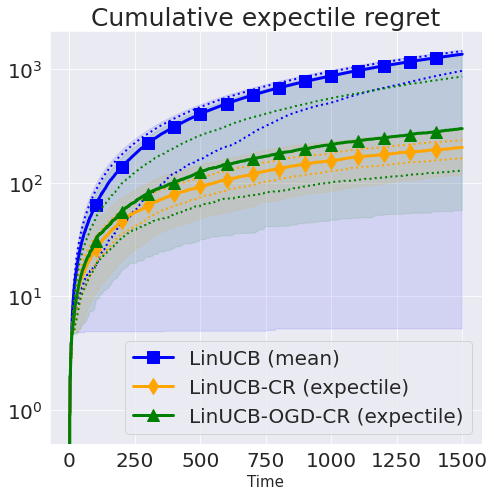

In [9]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)
    
    for alg in algs:
        ax.plot(tt, m_regrets[alg], color=colors[alg], label=labels[alg], linewidth=3, marker=markers[alg], markersize=12, markevery=100)
        ax.fill_between(tt, y1=q_regrets_05[alg], y2=q_regrets_95[alg], color=colors[alg], alpha=0.1)
        ax.plot(tt, q_regrets_25[alg], color=colors[alg], linestyle='dotted', linewidth=2)
        ax.plot(tt, q_regrets_75[alg], color=colors[alg], linestyle='dotted', linewidth=2)
        
        #         ax.fill_between(
#             tt, 
#             y1=np.clip(m_regrets[alg] - 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None), 
#             y2=np.clip(m_regrets[alg] + 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None),
#             color=colors[alg], 
#             alpha=0.1
#         )
    
#     ax.set_xlim([1, T])
#     ax.set_ylim([10, 1000])
    ax.set_yscale('log')
    ax.set_xlabel('Time', fontsize=15)
    
    ax.set_title('Cumulative expectile regret', fontsize=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(loc='lower right', prop={'size': 20})

    plt.tight_layout()
    plt.show()
    fig.savefig('expectile_linucb.pdf', format='pdf')

## UCB Entropic Risk

In [10]:
with open('results/entropic_ucb_766455.pkl', 'rb') as f:
    res = pickle.load(f)

In [11]:
print(res['info'])

T  = res['info']['T']
M  = res['info']['M']
n_iter_ogd = res['info']['n_iter_ogd']
step_size = res['info']['step_size']
tt = np.linspace(1, T, T)

algs = ['ucb', 'entropic_ucb', 'entropic_ogducb']
colors = dict(zip(algs, ['blue', 'orange', 'green']))
labels = dict(zip(algs, ['LinUCB (mean)', 'LinUCB-CR (entropic)', 'LinUCB-OGD-CR (entropic)']))
markers = dict(zip(algs, ['s', 'd', '^']))

m_regrets = {}
std_regrets = {}
q_regrets_25 = {}
q_regrets_75 = {}
q_regrets_05 = {}
q_regrets_95 = {}

mean_time = {}
std_time = {}

for alg in algs:
    R = np.cumsum(res['results'][alg], axis=0)
    m_regrets[alg] = np.median(R, axis=1)
    std_regrets[alg] = np.std(R, axis=1)
    q_regrets_25[alg] = np.quantile(R, 0.25, axis=1)
    q_regrets_75[alg] = np.quantile(R, 0.75, axis=1)
    q_regrets_05[alg] = np.quantile(R, 0.05, axis=1)
    q_regrets_95[alg] = np.quantile(R, 0.95, axis=1)
    
    mean_time[alg] =  np.round(np.mean(res['results']['time_' + alg]), 2)
    std_time[alg] = np.round(np.std(res['results']['time_' + alg]), 2)
    
print(
    {
        'mean_time':mean_time,
        'std_time': std_time,
    }
)

{'T': 1500, 'M': 500, 'regularization': 0.1, 'exploration_bonus_scale': 1.0, 'n_iter_ogd': 5, 'step_size': 0.1, 'warmup': 5}
{'mean_time': {'ucb': 0.58, 'entropic_ucb': 530.13, 'entropic_ogducb': 26.14}, 'std_time': {'ucb': 0.02, 'entropic_ucb': 31.33, 'entropic_ogducb': 4.95}}


In [12]:
markers = {
    'ucb': 's',
    'entropic_ucb': 'd',
    'entropic_ogducb': '^',
}

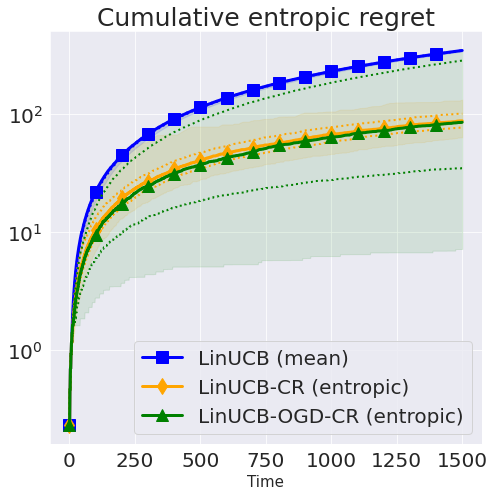

In [13]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)
    
    for alg in algs:
        ax.plot(tt, m_regrets[alg], color=colors[alg], label=labels[alg], linewidth=3, marker=markers[alg], markersize=12, markevery=100)
        ax.fill_between(tt, y1=q_regrets_05[alg], y2=q_regrets_95[alg], color=colors[alg], alpha=0.1)
        ax.plot(tt, q_regrets_25[alg], color=colors[alg], linestyle='dotted', linewidth=2)
        ax.plot(tt, q_regrets_75[alg], color=colors[alg], linestyle='dotted', linewidth=2)
            
#         ax.fill_between(
#             tt, 
#             y1=np.clip(m_regrets[alg] - 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None), 
#             y2=np.clip(m_regrets[alg] + 1.96 / np.sqrt(M) * std_regrets[alg], 0.0, None),
#             color=colors[alg], 
#             alpha=0.1
#         )
    
#     ax.set_xlim([1, T])
#     ax.set_ylim([10, 1000])
    ax.set_yscale('log')
    ax.set_xlabel('Time', fontsize=15)
    
    ax.set_title('Cumulative entropic regret', fontsize=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(loc='lower right', prop={'size': 20})

    plt.tight_layout()
    plt.show()
    fig.savefig('entropic_ucb.pdf', format='pdf')